# Creating Spatial Data

A common operation in spatial analysis is to take non-spatial data, such as CSV files, and creating a spatial dataset from it using coordinate information contained in the file. GeoPandas provides a convenient way to take data from a delimited-text file, create geometry and write the results as a spatial dataset.

We will read a tab-delimited file of places, filter it to a feature class, create a GeoDataFrame and export it as a GeoPackage file.

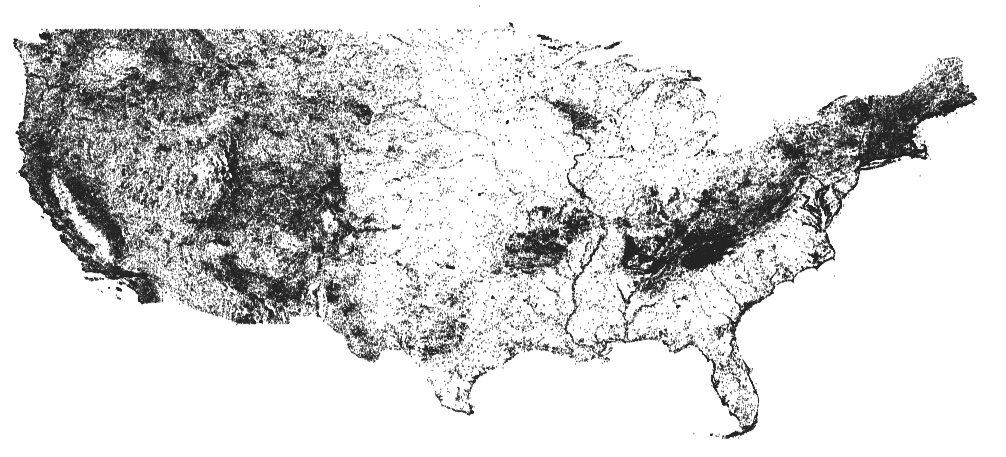

In [2]:
import os
import pandas as pd
import geopandas as gpd

In [3]:
data_pkg_path = 'data/geonames/'
filename = 'US.txt'
path = os.path.join(data_pkg_path, filename)

## Reading Tab-Delimited Files

The source data comes from [GeoNames](https://en.wikipedia.org/wiki/GeoNames) - a free and open database of geographic names of the world. It is a huge database containing millions of records per country. The data is distributed as country-level text files in a tab-delimited format. The files do not contain a header row with column names, so we need to specify them when reading the data. The data format is described in detail on the [Data Export](https://www.geonames.org/export/) page.

We specify the separator as **\\t** (tab) as an argument to the `read_csv()` method. Note that the file for USA has more than 2M records.

In [4]:
column_names = [
    'geonameid', 'name', 'asciiname', 'alternatenames', 
    'latitude', 'longitude', 'feature class', 'feature code',
    'country code', 'cc2', 'admin1 code', 'admin2 code',
    'admin3 code', 'admin4 code', 'population', 'elevation',
    'dem', 'timezone', 'modification date'
]

df = pd.read_csv(path, sep='\t', names=column_names)
df.info()

/tmp/ipykernel_75/2504440994.py:9: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep='\t', names=column_names)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237861 entries, 0 to 2237860
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   geonameid          int64  
 1   name               object 
 2   asciiname          object 
 3   alternatenames     object 
 4   latitude           float64
 5   longitude          float64
 6   feature class      object 
 7   feature code       object 
 8   country code       object 
 9   cc2                object 
 10  admin1 code        object 
 11  admin2 code        object 
 12  admin3 code        float64
 13  admin4 code        float64
 14  population         int64  
 15  elevation          float64
 16  dem                int64  
 17  timezone           object 
 18  modification date  object 
dtypes: float64(5), int64(3), object(11)
memory usage: 324.4+ MB


## Filtering Data

The input data as a column `feature_class` categorizing the place into [9 feature classes](https://www.geonames.org/export/codes.html). We can select all rows with the value `T` with the category  *mountain,hill,rock...*

In [5]:
mountains = df[df['feature class']=='T']
mountains.head()[['name', 'latitude', 'longitude', 'dem','feature class']] 

,name,latitude,longitude,dem,feature class
15,Vulcan Point,52.10222,177.53889,-9999,T
16,Tropical Ridge,51.99167,177.50833,267,T
17,Thirty-Seven Hill,52.84528,173.15278,193,T
20,Square Point,52.86120,173.33679,30,T
21,Square Bluff,51.65000,178.70000,-9999,T


## Creating Geometries

GeoPandas has a conveinent function `points_from_xy()` that creates a Geometry column from X and Y coordinates. We can then take a Pandas dataframe and create a GeoDataFrame by specifying a CRS and the geometry column.

In [7]:
geometry = gpd.points_from_xy(mountains.longitude, mountains.latitude) # convert latitude and longitude into a geometry column
gdf = gpd.GeoDataFrame(mountains, crs='EPSG:4326', geometry=geometry) # pandas DF, specify CRS, geometry column
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 225328 entries, 15 to 2237836
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   geonameid          225328 non-null  int64   
 1   name               225328 non-null  object  
 2   asciiname          225328 non-null  object  
 3   alternatenames     30933 non-null   object  
 4   latitude           225328 non-null  float64 
 5   longitude          225328 non-null  float64 
 6   feature class      225328 non-null  object  
 7   feature code       225328 non-null  object  
 8   country code       225328 non-null  object  
 9   cc2                5 non-null       object  
 10  admin1 code        225327 non-null  object  
 11  admin2 code        225170 non-null  object  
 12  admin3 code        21646 non-null   float64 
 13  admin4 code        0 non-null       float64 
 14  population         225328 non-null  int64   
 15  elevation          22441

## Writing Files

We can write the resulting GeoDataFrame to any of the supported vector data format. Here we are writing it as a new GeoPackage file.

You can open the resulting geopackage in a GIS and view the data.

In [8]:
output_dir = 'output'
output_filename = 'mountains.gpkg'
output_path = os.path.join(output_dir, output_filename)

gdf.to_file(driver='GPKG', filename=output_path, encoding='utf-8')
print('Successfully written output file at {}'.format(output_path))

Successfully written output file at output/mountains.gpkg


## Exercise

The data package contains multiple geonames text files from different countries in the `geonames/` folder. Write code to read all the files, merge them and extract the mountain features to a single geopackage.

- Example Workflow:
    - 1. Create an empty list called `dataframes`
    - 2. Iterate over the filenames and within the loop
        - a. Construct the path to the file
        - b. Read it using pandas
        - c. Filter it for the mountain features
        - d. Append to the list `dataframes`. 
    - Use `pd.concat()` function to merge the list of dataframes.
    - Create a GeoDataFrame
    - Write the GeoDataFrame to a file.

## My Solution

In [20]:
import os
import pandas as pd
import geopandas as gpd

# config file names and path
data_pkg_path = 'data/geonames/'
files = os.listdir(data_pkg_path)
print(files)

# 1. Create an empty list called dataframes
dataframes = []

#  The files do not contain a header row with column names, so we need to specify them when reading the data
column_names = [
    'geonameid', 'name', 'asciiname', 'alternatenames', 
    'latitude', 'longitude', 'feature class', 'feature code',
    'country code', 'cc2', 'admin1 code', 'admin2 code',
    'admin3 code', 'admin4 code', 'population', 'elevation',
    'dem', 'timezone', 'modification date'
]

# 2. Iterate over the filenames and within the loop
for file in files:
    
    # a. Construct the path to the file
    path = os.path.join(data_pkg_path,file)
    
    # b. Read it using pandas
    df = pd.read_csv(path, sep='\t', names=column_names)
    
    # c. Filter it for the mountain features
    mountains = df[df['feature class']=='T']
    
    # d. Append to the list dataframes
    dataframes.append(mountains)
    
    # merge the list of dataframes
    merged_df = pd.concat(dataframes)#
    
    # convert latitude and longitude into a geometry column
    geometry = gpd.points_from_xy(merged_df.longitude, merged_df.latitude)
    
    # Create a GeoDataFrame by calling 1. pandas DF 2. specify CRS, 3. geometry column
    gdf = gpd.GeoDataFrame(merged_df, crs='EPSG:4326', geometry=geometry)     

['MX.txt', 'US.txt', 'CA.txt']


/tmp/ipykernel_75/995739627.py:24: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep='\t', names=column_names)
/tmp/ipykernel_75/995739627.py:24: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep='\t', names=column_names)
/tmp/ipykernel_75/995739627.py:24: DtypeWarning: Columns (9,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep='\t', names=column_names)


In [21]:
output_dir = 'output'
output_filename = 'mountain_features.gpkg'
output_path = os.path.join(output_dir, output_filename)

gdf.to_file(driver='GPKG', filename=output_path, encoding='utf-8')   
print('Successfully written output file at {}'.format(output_path))

Successfully written output file at output/mountain_features.gpkg
